# Final Project Report

* Class: DS 5100
* Student Name: Léa Runesha
* Student Net ID: lgr2sge
* This URL: https://github.com/learunesha/ds5100-finalproject-lgr2sge

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/learunesha/ds5100-finalproject-lgr2sge/blob/main/montecarlo/montecarlo.py

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

# A code block with your classes.


```python

import numpy as np
import pandas as pd

class Die:
    """
    A class representing a die with N faces and associated weights.

    Attributes
    ----------
    faces : np.ndarray
        A NumPy array of faces of the die.
    weights : pd.DataFrame
        A DataFrame containing the faces and their respective weights.
    """
    
    def __init__(self, faces: np.ndarray):
        """
        Initialize the die with faces and equal weights.

        Parameters
        ----------
        faces : np.ndarray
            An array of faces, either strings or numbers.

        Raises
        ------
        TypeError
            If faces are not a NumPy array.
        ValueError
            If faces are not unique.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array")
        if len(faces) != len(set(faces)):
            raise ValueError("Faces must be unique")
        
        self.faces = faces
        self.weights = pd.DataFrame({'faces': faces, 'weights': [1.0] * len(faces)}).set_index('faces')

    def change_weight(self, face, weight: float):
        """
        Change the weight of a given face.

        Parameters
        ----------
        face : str or int
            The face whose weight is to be changed.
        weight : float
            The new weight for the face.

        Raises
        ------
        IndexError
            If face is not in the die.
        TypeError
            If weight is not a float.
        """
        if face not in self.weights.index:
            raise IndexError("Face not found in die faces")
        if not isinstance(weight, (float, int)):
            raise TypeError("Weight must be a numeric type")
        
        self.weights.at[face, 'weights'] = weight

    def roll(self, rolls=1):
        """
        Roll the die one or more times.

        Parameters
        ----------
        rolls : int, optional
            Number of times to roll the die, default is 1.

        Returns
        -------
        list
            List of outcomes.
        """
        return self.weights.sample(n=rolls, weights='weights', replace=True).index.tolist()

    def show(self):
        """
        Show the current state of the die.

        Returns
        -------
        pd.DataFrame
            DataFrame with faces and weights.
        """
        return self.weights.copy()



class Game:
    """
    A class representing a game involving rolling multiple dice.

    Attributes
    ----------
    dice : list
        A list of Die objects.
    results : pd.DataFrame
        A DataFrame to store the results of the most recent play.
    """
    
    def __init__(self, dice: list):
        """
        Initialize the game with a list of dice.

        Parameters
        ----------
        dice : list
            A list of Die objects.
        """
        self.dice = dice
        self.results = pd.DataFrame()

    def play(self, n_rolls):
        """
        Roll all dice a given number of times.

        Parameters
        ----------
        rolls : int
            The number of times to roll the dice.
        """
        results = []
        for _ in range(n_rolls):
            roll_result = tuple(die.roll()[0] for die in self.dice)
            results.append(roll_result)
        self.results = pd.DataFrame(results)


    def show(self, form='wide'):
        """
        Display the results of the game in the specified format.
        
        Parameters:
        form (str): The format to display the results in. 
            'wide' returns the original DataFrame format.
            'narrow' returns a melted DataFrame with 'Die' and 'Face' columns.
            
        Returns:
        pd.DataFrame: The game results in the specified format.
        
        Raises:
        ValueError: If the form specified is neither 'wide' nor 'narrow'.
        """
       
        if form == 'wide':
            return self.results
        elif form == 'narrow':
            return self.results.melt(var_name='Die', value_name='Face')
        else:
            raise ValueError("Invalid form specified. Use 'wide' or 'narrow'.")



class Analyzer:
    """
    A class to analyze the results of a game.

    Attributes
    ----------
    game : Game
        The game object to analyze.
    results : pd.DataFrame
        The results of the game.
    """

    def __init__(self, game: Game):
        """
        Initialize the analyzer with a game object.

        Parameters
        ----------
        game : Game
            A game object to analyze.

        Raises
        ------
        ValueError
            If the passed object is not a Game.
        """
        if not isinstance(game, Game):
            raise ValueError("The input must be a Game object")

        self.game = game
        self.results = game.show()

    def jackpot(self):
        """
        Compute the number of jackpots.

        Returns
        -------
        int
            Number of jackpots.
        """
        return int((self.game.results.nunique(axis=1) == 1).sum())

    def face_counts_per_roll(self):
        """
        Compute the face counts per roll.

        Returns
        -------
        pd.DataFrame
            DataFrame with face counts per roll.
        """
        return self.game.results.apply(lambda x:pd.Series(x).value_counts()).fillna(0).astype(int)

    def combo_count(self):
        """
        Compute the distinct combinations and their counts.

        Returns
        -------
        pd.DataFrame
            DataFrame with distinct combinations and their counts.
        """
        combos = self.results.apply(lambda x: tuple(sorted(x)), axis=1)
        return combos.value_counts().reset_index(name='count').rename(columns={'index': 'combination'})

    def permutation_count(self):
        """
        Compute the distinct permutations and their counts.

        Returns
        -------
        pd.DataFrame
            DataFrame with distinct permutations and their counts.
        """
        permutations = self.results.apply(tuple, axis=1)
        return permutations.value_counts().reset_index(name='count').rename(columns={'index': 'permutation'})

```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

# A code block with your test code.

```python

import unittest
import numpy as np
import pandas as pd
from montecarlo.montecarlo import Die, Game, Analyzer



class TestDie(unittest.TestCase):
    """Test cases for Die class."""

    def setUp(self):
        """Set up a Die instance for testing."""
        faces = np.array([1, 2, 3, 4, 5, 6])
        self.die = Die(faces)

    def test_init(self):
        """Test Die initialization."""
        self.assertEqual(len(self.die.faces), 6)
        self.assertTrue(np.array_equal(self.die.faces, np.array([1, 2, 3, 4, 5, 6])))
        self.assertTrue(np.all(self.die.weights['weights'] == 1.0))

    def test_change_weight(self):
        """Test changing the weight of a face."""
        self.die.change_weight(1, 2.0)
        self.assertEqual(self.die.weights.at[1, 'weights'], 2.0)
        with self.assertRaises(IndexError):
            self.die.change_weight(7, 1.0)
        with self.assertRaises(TypeError):
            self.die.change_weight(1, 'a')

    def test_roll(self):
        """Test rolling the die."""
        rolls = self.die.roll(5)
        self.assertEqual(len(rolls), 5)
        for face in rolls:
            self.assertIn(face, self.die.faces)

    def test_show(self):
        """Test showing the die's current state."""
        weights = self.die.show()
        self.assertTrue(weights.equals(self.die.weights))



class TestGame(unittest.TestCase):
    """Test cases for Game class."""

    def setUp(self):
        """Set up a Game instance for testing."""
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])

    def test_init(self):
        """Test Game initialization."""
        self.assertEqual(len(self.game.dice), 2)
        self.assertIsInstance(self.game.dice[0], Die)

    def test_play(self):
        """Test playing the game."""
        self.game.play(10)
        self.assertEqual(len(self.game.results), 10)
        self.assertEqual(self.game.results.shape[1], 2)

    def test_show(self):
        """Test showing the game's most recent play results."""
        self.game.play(5)
        results_wide = self.game.show()
        results_narrow = self.game.show('narrow')
        self.assertEqual(results_wide.shape, (5, 2))
        self.assertEqual(results_narrow.shape, (10, 2))
        with self.assertRaises(ValueError):
            self.game.show('invalid')



class TestAnalyzer(unittest.TestCase):
    """Test cases for Analyzer class."""

    def setUp(self):
        """Set up an Analyzer instance for testing."""
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_init(self):
        """Test Analyzer initialization"""
        faces = np.array([1,2,3,4,5,6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        analyzer = Analyzer(game)
        self.assertIsInstance(analyzer.game,Game)
        self.assertIsInstance(analyzer.results, pd.DataFrame)

    def test_jackpot(self):
        """Test computing the number of jackpots."""
        jackpots = self.analyzer.jackpot()
        self.assertIsInstance(jackpots, int)

    def test_face_counts_per_roll(self):
        """Test computing face counts per roll."""
        face_counts = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(face_counts, pd.DataFrame)
        self.assertEqual(face_counts.shape, (6,2))

    def test_combo_count(self):
        """Test computing distinct combinations of faces rolled."""
        combo_counts = self.analyzer.combo_count()
        self.assertIsInstance(combo_counts, pd.DataFrame)

    def test_permutation_count(self):
        """Test computing distinct permutations of faces rolled."""
        permutation_counts = self.analyzer.permutation_count()
        self.assertIsInstance(permutation_counts, pd.DataFrame)

if __name__ == '__main__':
    unittest.main()

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

# A text block with the output of a successful test.

```bash
-bash-4.4$ vim montecarlo_test.py
-bash-4.4$ python3 -m unittest montecarlo_test.py
............
----------------------------------------------------------------------
Ran 12 tests in 0.169s

OK
-bash-4.4$
```


## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [3]:
import numpy as np
import pandas as pd
import itertools
from montecarlo.montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Die)

Help on class Die in module montecarlo.montecarlo:

class Die(builtins.object)
 |  Die(faces: numpy.ndarray)
 |  
 |  A class representing a die with N faces and associated weights.
 |  
 |  Attributes
 |  ----------
 |  faces : np.ndarray
 |      A NumPy array of faces of the die.
 |  weights : pd.DataFrame
 |      A DataFrame containing the faces and their respective weights.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces: numpy.ndarray)
 |      Initialize the die with faces and equal weights.
 |      
 |      Parameters
 |      ----------
 |      faces : np.ndarray
 |          An array of faces, either strings or numbers.
 |      
 |      Raises
 |      ------
 |      TypeError
 |          If faces are not a NumPy array.
 |      ValueError
 |          If faces are not unique.
 |  
 |  change_weight(self, face, weight: float)
 |      Change the weight of a given face.
 |      
 |      Parameters
 |      ----------
 |      face : str or int
 |          The face whose wei

In [3]:
help(Game)

Help on class Game in module montecarlo.montecarlo:

class Game(builtins.object)
 |  Game(dice: list)
 |  
 |  A class representing a game involving rolling multiple dice.
 |  
 |  Attributes
 |  ----------
 |  dice : list
 |      A list of Die objects.
 |  results : pd.DataFrame
 |      A DataFrame to store the results of the most recent play.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice: list)
 |      Initialize the game with a list of dice.
 |      
 |      Parameters
 |      ----------
 |      dice : list
 |          A list of Die objects.
 |  
 |  play(self, n_rolls)
 |      Roll all dice a given number of times.
 |      
 |      Parameters
 |      ----------
 |      rolls : int
 |          The number of times to roll the dice.
 |  
 |  show(self, form='wide')
 |      Display the results of the game in the specified format.
 |      
 |      Parameters:
 |      form (str): The format to display the results in. 
 |          'wide' returns the original DataFrame format

In [4]:
help(Analyzer)

Help on class Analyzer in module montecarlo.montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game: montecarlo.montecarlo.Game)
 |  
 |  A class to analyze the results of a game.
 |  
 |  Attributes
 |  ----------
 |  game : Game
 |      The game object to analyze.
 |  results : pd.DataFrame
 |      The results of the game.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game: montecarlo.montecarlo.Game)
 |      Initialize the analyzer with a game object.
 |      
 |      Parameters
 |      ----------
 |      game : Game
 |          A game object to analyze.
 |      
 |      Raises
 |      ------
 |      ValueError
 |          If the passed object is not a Game.
 |  
 |  combo_count(self)
 |      Compute the distinct combinations and their counts.
 |      
 |      Returns
 |      -------
 |      pd.DataFrame
 |          DataFrame with distinct combinations and their counts.
 |  
 |  face_counts_per_roll(self)
 |      Compute the face counts per roll.
 |      
 |      Ret

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/learunesha/ds5100-finalproject-lgr2sge/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

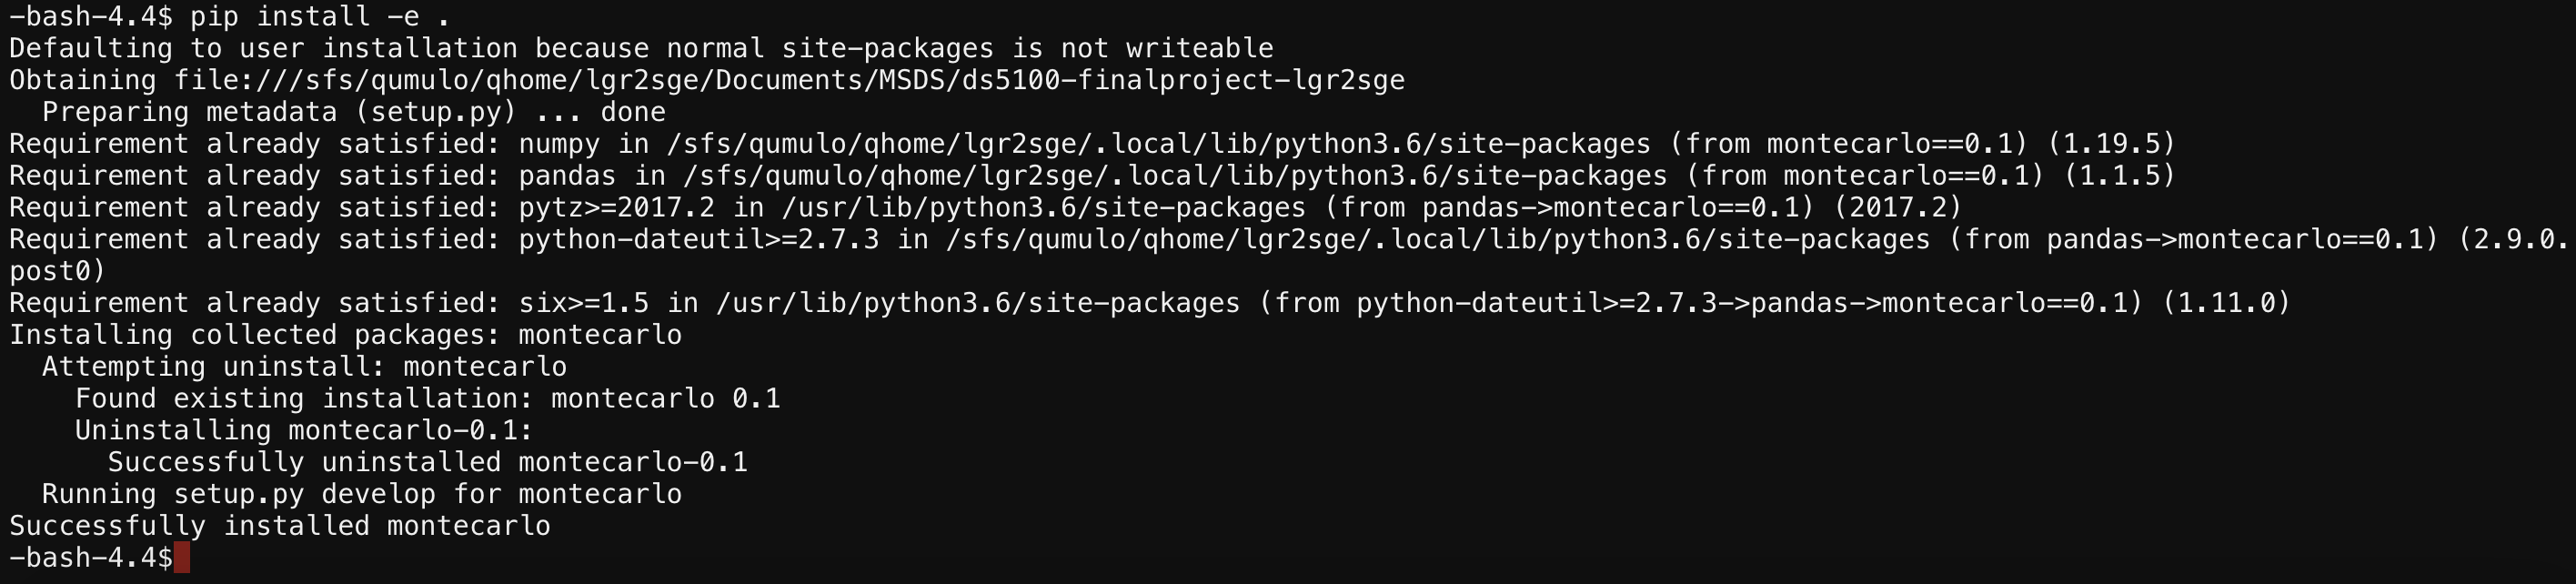

In [5]:
from IPython.display import Image
Image(filename='install_screenshot.png')

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [2]:
fair_coin_faces = np.array(['H' , 'T'])
fair_coin = Die(fair_coin_faces)
fair_coin.show()

,weights
faces,
H,1.0
T,1.0


In [3]:
unfair_coin_faces = np.array(['H' , 'T'])
unfair_coin = Die(unfair_coin_faces)
unfair_coin.change_weight('H' , 5)
unfair_coin.show()

,weights
faces,
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
fair_coin1 = Die(fair_coin_faces) 
fair_coin2 = Die(fair_coin_faces) 

game_one = Game([fair_coin1, fair_coin2])
game_one.play(1000)

game_one.show()

,0,1
0,T,T
1,H,T
2,T,T
3,H,T
4,T,H
...,...,...
995,H,H
996,H,H
997,T,T
998,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
fair_coin3 = Die(fair_coin_faces) 
unfair_coin1 = Die(unfair_coin_faces) 
unfair_coin2 = Die(unfair_coin_faces) 

game_two = Game([fair_coin3, unfair_coin1, unfair_coin2])
game_two.play(1000)

game_two.show()

,0,1,2
0,H,T,T
1,H,T,H
2,H,H,H
3,T,T,T
4,H,T,T
...,...,...,...
995,H,T,H
996,H,T,H
997,T,H,T
998,H,H,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
analyzer_game_one = Analyzer(game_one)
game_one_jackpots = analyzer_game_one.jackpot()
game_one_jackpots

522

In [7]:
analyzer_game_two = Analyzer(game_two)
game_two_jackpots = analyzer_game_two.jackpot()
game_two_jackpots

230

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
total_game_one = len(game_one.results)
relative_freq_game_one = game_one_jackpots / total_game_one
relative_freq_game_one

0.522

In [9]:
total_game_two = len(game_two.results)
relative_freq_game_two = game_two_jackpots / total_game_two
relative_freq_game_two

0.23

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 0, 'Game')

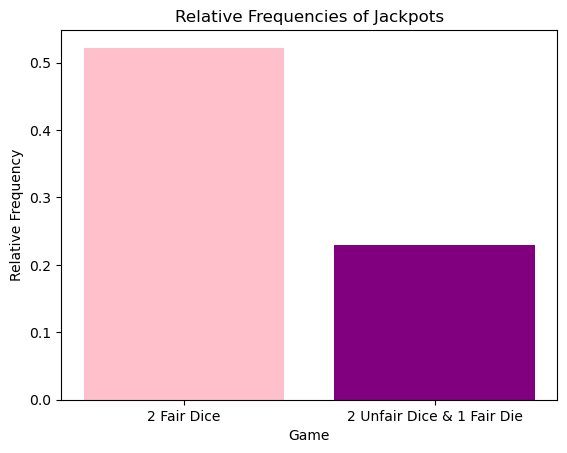

In [10]:
import matplotlib.pyplot as plt

labels = ['2 Fair Dice' , '2 Unfair Dice & 1 Fair Die']
relative_freqs = [relative_freq_game_one , relative_freq_game_two]

fig, ax = plt.subplots()
ax.bar(labels, relative_freqs, color = ['pink' , 'purple'])

ax.set_title('Relative Frequencies of Jackpots')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Game')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
faces = np.array([1,2,3,4,5,6])
die1 = Die(faces)
die2 = Die(faces)
die3 = Die(faces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
die3.change_weight(6,5)
die3.show()

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
die2.change_weight(1,5)
die2.show()

,weights
faces,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
die4 = Die(faces)
die5 = Die(faces)
die6 = Die(faces)
die7 = Die(faces)
die8 = Die(faces)

game_three = Game([die4, die5, die6, die7, die8])
game_three.play(10000)
game_three.show()

,0,1,2,3,4
0,4,6,5,3,3
1,4,2,2,4,6
2,2,1,6,1,2
3,6,4,6,5,5
4,2,5,1,2,1
...,...,...,...,...,...
9995,5,6,4,3,1
9996,6,2,2,5,1
9997,6,1,1,5,6
9998,5,5,4,1,6


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
game_four = Game([die2, die3, die4, die5, die6])
game_four.play(10000)
game_four.show()

,0,1,2,3,4
0,3,1,4,1,4
1,1,6,5,3,3
2,4,6,6,1,1
3,1,2,3,5,5
4,4,6,2,4,5
...,...,...,...,...,...
9995,1,6,5,3,5
9996,1,2,5,4,4
9997,1,6,2,2,5
9998,5,4,6,6,4


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [16]:
analyzer_game_three = Analyzer(game_three)
game_three_jackpots = analyzer_game_three.jackpot()
game_three_jackpots

10

In [17]:
total_game_three = len(game_three.results)
relative_freq_game_three = game_three_jackpots / total_game_three
relative_freq_game_three

0.001

In [18]:
analyzer_game_four = Analyzer(game_four)
game_four_jackpots = analyzer_game_four.jackpot()
game_four_jackpots

6

In [19]:
total_game_four = len(game_four.results)
relative_freq_game_four = game_four_jackpots / total_game_four
relative_freq_game_four

0.0006

Text(0.5, 0, 'Game')

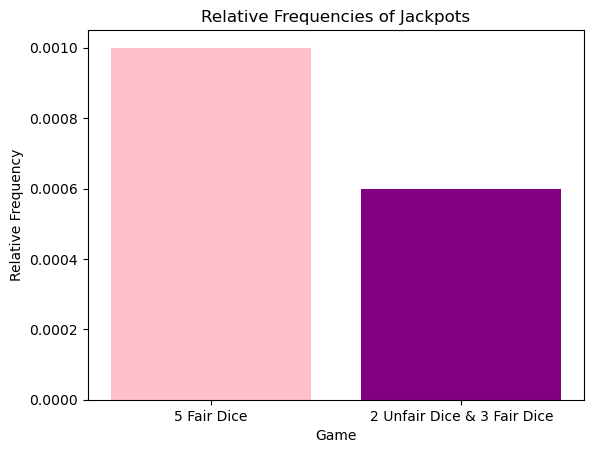

In [20]:
labels = ['5 Fair Dice' , '2 Unfair Dice & 3 Fair Dice']
relative_freqs = [relative_freq_game_three , relative_freq_game_four]

fig, ax = plt.subplots()
ax.bar(labels, relative_freqs, color = ['pink' , 'purple'])

ax.set_title('Relative Frequencies of Jackpots')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Game')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [5]:
english_letters_file = "/home/lgr2sge/Documents/MSDS/ds5100-finalproject-lgr2sge/english_letters.txt"
english_letters = pd.read_csv(english_letters_file, delimiter = ' ', header=None, names=['letter' , 'frequency'])

total_freq = english_letters['frequency'].sum()
english_letters['weight'] = english_letters['frequency']/total_freq

die_faces = english_letters['letter'].values
die_weights = english_letters['weight'].values

die = Die(die_faces)
for face, weight in zip(die_faces, die_weights):
    die.change_weight(face, weight)
    
die.show()

,weights
faces,
E,0.120965
T,0.089381
A,0.085517
O,0.074673
I,0.073251
N,0.071722
S,0.067282
R,0.063327
H,0.049557


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [6]:
letter_die = Die(die_faces)

dice = [letter_die for _ in range(4)]

game_five = Game(dice)

game_five.play(1000)

game_five.show()

,0,1,2,3
0,P,O,I,R
1,P,E,A,L
2,C,K,P,B
3,A,U,B,V
4,M,U,O,O
...,...,...,...,...
995,W,R,J,R
996,H,L,J,H
997,J,I,Y,R
998,L,Q,V,H


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [11]:
analyzer = Analyzer(game_five)

game_permutations = analyzer.permutation_count()

with open('scrabble_words.txt', 'r') as f:
    scrabble_words = set(word.strip().lower() for word in f)

english_word_count = 0
total_permutations = 0

for _, row in game_permutations.iterrows():
    perm = row['permutation']
    count = row['count']
    total_permutations += count
    
    # Check if any permutation of the current combination is a valid word
    for word in set(''.join(p) for p in itertools.permutations(perm)):
        if word.lower() in scrabble_words:
            english_word_count += count
            break  # Count each combination only once if it forms a valid word

non_english_word_count = total_permutations - english_word_count

print(f"Total permutations: {total_permutations}")
print(f"Valid English words: {english_word_count}")
print(f"Non-English words: {non_english_word_count}")

Total permutations: 1000
Valid English words: 161
Non-English words: 839


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [12]:
die_five = Die(die_faces)

dice_list2 = [Die(die_faces.copy()) for _ in range(5)]

for die in dice_list2:
    for face, weight in zip(die_faces, die_weights):
        die.change_weight(face, weight)
        

game_six = Game(dice_list2)
game_six.play(1000)
game_six.show()

,0,1,2,3,4
0,E,R,T,I,T
1,O,H,R,E,R
2,A,T,T,O,O
3,R,U,H,I,M
4,E,L,A,U,R
...,...,...,...,...,...
995,H,S,U,V,E
996,P,O,E,T,H
997,I,I,T,R,A
998,O,E,L,S,E


In [13]:
analyzer = Analyzer(game_six)

game_permutations = analyzer.permutation_count()

with open('scrabble_words.txt', 'r') as f:
    scrabble_words = set(word.strip().lower() for word in f)

english_word_count = 0
total_permutations = 0

for _, row in game_permutations.iterrows():
    perm = row['permutation']
    count = row['count']
    total_permutations += count
    
    # Check if any permutation of the current combination is a valid word
    for word in set(''.join(p) for p in itertools.permutations(perm)):
        if word.lower() in scrabble_words:
            english_word_count += count
            break  # Count each combination only once if it forms a valid word

non_english_word_count = total_permutations - english_word_count

print(f"Total permutations: {total_permutations}")
print(f"Valid English words: {english_word_count}")
print(f"Non-English words: {non_english_word_count}")

Total permutations: 1000
Valid English words: 342
Non-English words: 658
